## Importing dependencies

In [1]:
import math
import pandas_datareader as web
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import datetime
import yfinance as yf
from pandas_datareader import data
plt.style.use('fivethirtyeight')

## Getting data from yahoo finance

In [2]:
start_date = '2015-01-01'
end_date = '2021-01-05'
ticker = 'AAPL'
data = yf.download(ticker, start_date, end_date)
print(data.shape)
print(data.head())

[*********************100%***********************]  1 of 1 completed
(1512, 6)
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2015-01-02  27.847500  27.860001  26.837500  27.332500  24.565695  212818400
2015-01-05  27.072500  27.162500  26.352501  26.562500  23.873638  257142000
2015-01-06  26.635000  26.857500  26.157499  26.565001  23.875891  263188400
2015-01-07  26.799999  27.049999  26.674999  26.937500  24.210682  160423600
2015-01-08  27.307501  28.037500  27.174999  27.972500  25.140903  237458000


## Ploting prices of Apple stock from 2015 to 2021

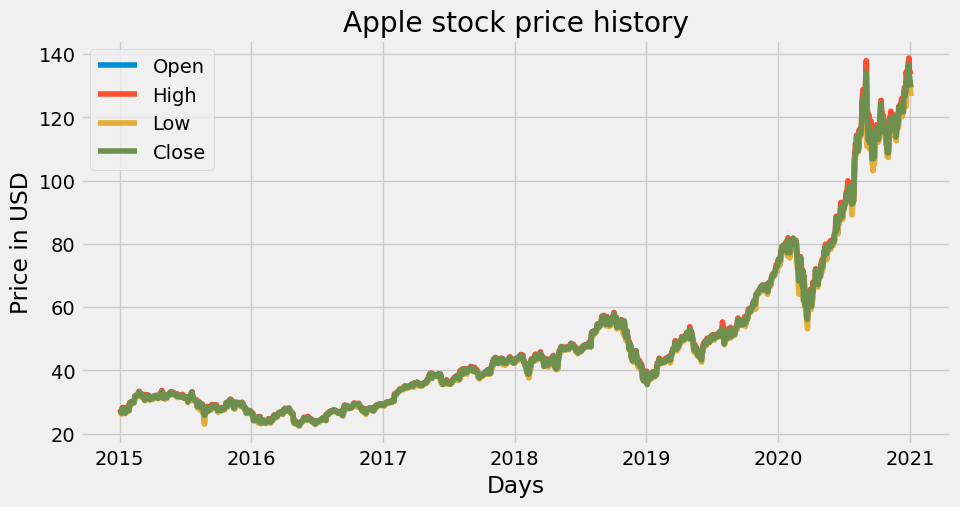

In [3]:
plt.figure(figsize = (10,5))
plt.plot(data["Open"])
plt.plot(data["High"])
plt.plot(data["Low"])
plt.plot(data["Close"])
plt.title('Apple stock price history')
plt.ylabel('Price in USD')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

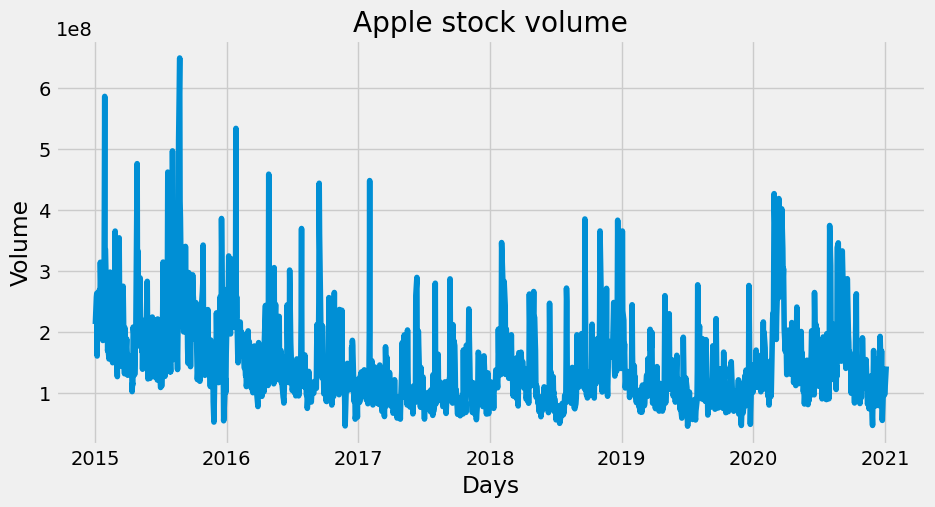

In [4]:
plt.figure(figsize = (10,5))
plt.plot(data["Volume"])
plt.title('Apple stock volume')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

## Converted data to numpy array

In [5]:
targetData = data.filter(['Close'])

# Convert the dataframe to a numpy
t = targetData.values

# 75% of the data for training set
trainingData_size = math.ceil(len(t)* 0.75)
trainingData_size
sc = MinMaxScaler(feature_range=(0,1))
scaledtraining_data = sc.fit_transform(t)
scaledtraining_data

array([[0.04160643],
       [0.03485825],
       [0.03488017],
       ...,
       [0.97397133],
       [0.96494457],
       [0.93619913]])

In [6]:
trainData = scaledtraining_data[0:trainingData_size  , : ]
X_train = []
y_train = []
for i in range(180, len(trainData)):
    X_train.append(trainData[i-180:i, 0])
    y_train.append(trainData[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train) 
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

(954, 180, 1)


## Adding layers to model 

In [7]:
model = Sequential()

#adding the first LSTM layer
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# adding a second LSTM layer
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# adding a third LSTM layer
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# adding a fourth LSTM layer
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# adding the output layer
model.add(Dense(units = 1))

# RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the model to the training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
30/30 [==============================] - 17s 280ms/step - loss: 0.0041
Epoch 2/100
30/30 [==============================] - 7s 234ms/step - loss: 6.6677e-04
Epoch 3/100
30/30 [==============================] - 7s 245ms/step - loss: 5.5096e-04
Epoch 4/100
30/30 [==============================] - 7s 232ms/step - loss: 5.3054e-04
Epoch 5/100
30/30 [==============================] - 7s 247ms/step - loss: 4.7809e-04
Epoch 6/100
30/30 [==============================] - 7s 226ms/step - loss: 5.3121e-04
Epoch 7/100
30/30 [==============================] - 7s 229ms/step - loss: 4.3990e-04
Epoch 8/100
30/30 [==============================] - 7s 235ms/step - loss: 4.4758e-04
Epoch 9/100
30/30 [==============================] - 7s 231ms/step - loss: 4.6871e-04
Epoch 10/100
30/30 [==============================] - 7s 235ms/step - loss: 4.2559e-04
Epoch 11/100
30/30 [==============================] - 7s 239ms/step - loss: 4.2226e-04
Epoch 12/100
30/30 [==============================] - 7

30/30 [==============================] - 7s 223ms/step - loss: 1.5253e-04
Epoch 96/100
30/30 [==============================] - 7s 227ms/step - loss: 1.3186e-04
Epoch 97/100
30/30 [==============================] - 6s 215ms/step - loss: 1.5751e-04
Epoch 98/100
30/30 [==============================] - 7s 222ms/step - loss: 1.3894e-04
Epoch 99/100
30/30 [==============================] - 6s 208ms/step - loss: 1.6095e-04
Epoch 100/100
30/30 [==============================] - 6s 210ms/step - loss: 1.4008e-04


In [8]:
testdata = scaledtraining_data[trainingData_size - 180: , : ]

X_test = []
y_test =  t[trainingData_size : , : ]
for i in range(180,len(testdata)):
    X_test.append(testdata[i-180:i,0])

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
print(X_test.shape)

(378, 180, 1)


## Predictions using the test dataset

In [9]:
predictedprice = model.predict(X_test)
predictedprice = sc.inverse_transform(predictedprice)

12/12 [==============================] - 3s 66ms/step


## Visualising the results

C:\Users\Raj\AppData\Local\Temp\ipykernel_16324\2501833470.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictedprice


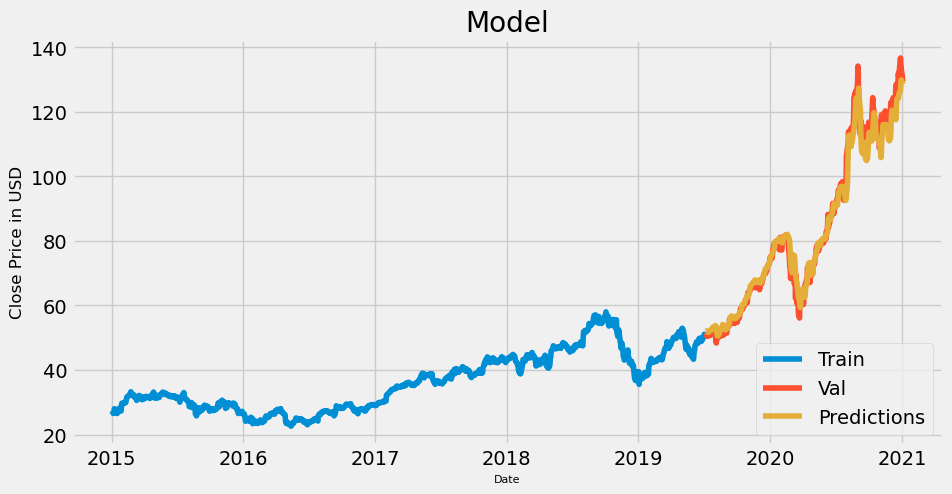

In [10]:
train = targetData[:trainingData_size]
valid = targetData[trainingData_size:]
valid['Predictions'] = predictedprice
plt.figure(figsize=(10,5))
plt.title('Model')
plt.xlabel('Date', fontsize=8)
plt.ylabel('Close Price in USD', fontsize=12)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [11]:
valid

,Close,Predictions
Date,,
2019-07-08,50.005001,52.018135
2019-07-09,50.310001,52.083965
2019-07-10,50.807499,51.928829
2019-07-11,50.437500,51.796429
2019-07-12,50.825001,51.701832
...,...,...
2020-12-28,136.690002,126.496826
2020-12-29,134.869995,128.427872
2020-12-30,133.720001,129.867432


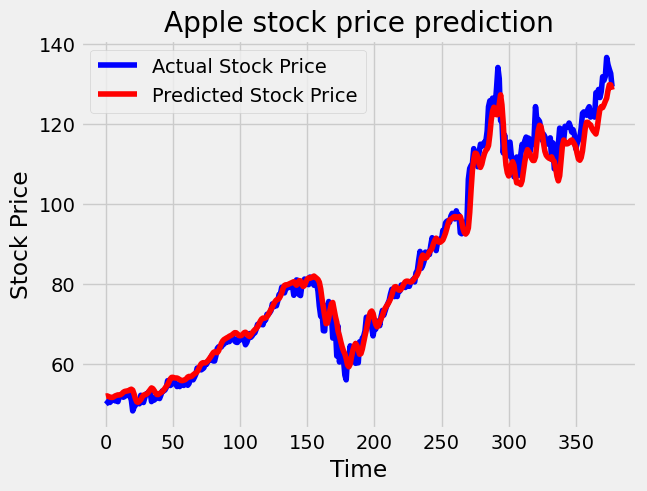

In [12]:
plt.plot(y_test, color = 'blue', label = 'Actual Stock Price')
plt.plot(predictedprice, color = 'red', label = 'Predicted Stock Price')
plt.title('Apple stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()